<h3 style='color:purple' align='center'>Random Forest Python Tutorial</h3>

**Digits dataset from sklearn**

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier


In [23]:
df = pd.read_excel('mun.xlsx')
df=df.drop(['date','longitude','latitude','sunset','sunrise'],axis=1)
df2 = pd.read_excel('Fix.xlsx')
df2=df2.drop([0])
df2


,วันที่เก็บข้อมูล,พื้นที่สำรวจ,Unnamed: 2,Unnamed: 3,พิกัดภูมิศาสตร์,Unnamed: 5,พันธุ์มันสำปะหลัง,อายุ (เดือน),โรคพุ่มแจ้,โรคใบด่าง,Unnamed: 10,โรคใบไหม้,Unnamed: 12,โรคแอนแทรคโนส,Unnamed: 14,โรคใบจุดสีน้ำตาล,Unnamed: 16,โรครากเน่า โคนเน่า,Unnamed: 18
1,2022-05-31,ระยอง,เมือง,ห้วยโป่ง,12.680193,101.099502,ระยอง 9,12.0,0,6,5,0,0,0,0,100,2,0,0
2,2022-06-08,ระยอง,เมือง,ห้วยโป่ง,12.725235,101.132818,ระยอง 9,4.0,7,0,0,0,0,0,0,100,2,0,0
3,2022-06-08,ระยอง,เมือง,ห้วยโป่ง,12.721843,101.105134,ระยอง 9,5.0,1,0,0,0,0,0,0,100,2,0,0
4,2023-09-06,ระยอง,เมือง,ห้วยโป่ง,12.722262,101.132949,ระยอง 9,4.0,0,0,0,,0,0,0,0,0,0,0
5,2023-09-06,ระยอง,เมือง,ห้วยโป่ง,12.709117,101.122987,ระยอง 9,5.0,0,0,0,0,0,0,0,70,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2023-09-13,ฉะเชิงเทรา,แปลงยาว,แปลงยาว,13.569677,101.326105,ระยอง 9,5.0,0,95,5,0,0,0,0,0,0,0,0
227,2023-09-13,ฉะเชิงเทรา,แปลงยาว,หนองไม้แก่น,13.717943,101.411067,ระยอง 9,5.0,0,0,0,0,0,0,0,20,2,0,0
228,2023-09-13,ฉะเชิงเทรา,แปลงยาว,หนองไม้แก่น,13.508858,101.337375,ระยอง 5,8.0,1,70,5,20,2,0,0,20,3,0,0
229,2023-09-13,ฉะเชิงเทรา,แปลงยาว,หนองไม้แก่น,13.534933,101.368851,ห้วยบง 60,3.0,0,60,5,0,0,0,0,30,2,0,0


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

**Train and the model and prediction**

In [25]:
X = df.iloc[:,lambda df: [0,2,5,6,7,9,11]]
y = df2.iloc[:,-4].values

In [26]:
X.values.reshape(-1, 1)
X.iloc[2]

uvb              110490.141480
stl1                303.714852
d2m                  25.099450
minTemp              28.691309
meanTemp             30.252224
RH                    0.740049
durationOfDay        12.850556
Name: 2, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit( X_train.astype(float),y_train)

RandomForestRegressor()

In [29]:
y_pre = model.predict(X_test)

In [30]:
from sklearn.metrics import  mean_squared_error  ,mean_absolute_error
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pre))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pre))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pre)))


Mean Absolute Error (MAE): 18.50260869565217
Mean Squared Error (MSE): 741.3780869565218
Root Mean Squared Error (RMSE): 27.228258977696715


In [31]:
model.score(X_test,y_test)

0.5038290705232111

In [32]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pre)

0.5038290705232111

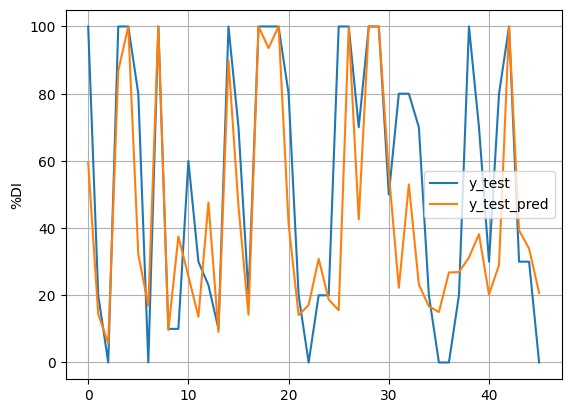

In [33]:
plt.plot(np.arange(len(y_pre)) ,y_test)
plt.plot(np.arange(len(y_pre)) , y_pre)
plt.legend(['y_test','y_test_pred'])
plt.ylabel("%DI")
plt.yticks(np.arange(0,101,20))
plt.grid()


plt.show()

In [34]:
y_test

array([100, 20, 0, 100, 100, 80, 0, 100, 10, 10, 60, 30, 23, 10, 100, 70,
       20, 100, 100, 100, 80, 20, 0, 20, 20, 100, 100, 70, 100, 100, 50,
       80, 80, 70, 20, 0, 0, 20, 100, 70, 30, 80, 100, 30, 30, 0],
      dtype=object)

In [35]:
import pickle

# save
with open('model2.pkl','wb') as f:
    pickle.dump(model,f)


In [36]:
# load
with open('model2.pkl', 'rb') as f:
    clf2 = pickle.load(f)

clf2.predict(X)

array([100.  , 100.  , 100.  ,  12.1 ,  47.4 , 100.  , 100.  ,  31.24,
         9.1 ,   8.1 , 100.  , 100.  , 100.  , 100.  ,  10.  ,  26.8 ,
       100.  ,  14.3 ,  15.  ,  98.98, 100.  , 100.  , 100.  ,  55.9 ,
         3.6 , 100.  , 100.  ,   1.3 ,   4.4 ,  53.1 , 100.  , 100.  ,
       100.  , 100.  ,   5.9 ,  14.6 ,   7.5 ,  42.6 ,  45.6 ,  55.8 ,
        28.4 ,  30.66,  87.12,  93.58,  93.58,   2.1 ,   5.6 ,   9.1 ,
         0.  ,   2.46,  42.7 ,   3.5 ,   7.  ,  15.23,  22.1 ,  23.2 ,
        21.5 ,   4.6 ,   4.1 ,  79.38,  92.08,  20.97,  12.67,  15.52,
        47.61,  75.78,  43.  ,  78.  ,  46.3 ,  46.2 ,  20.63,  35.84,
        53.62,  34.8 , 100.  , 100.  , 100.  , 100.  ,   7.5 ,   7.1 ,
       100.  , 100.  , 100.  ,  60.8 , 100.  , 100.  , 100.  ,  33.  ,
        21.6 ,  29.  ,  91.01,  16.5 ,  16.7 ,  14.1 ,  47.4 ,  89.05,
        32.2 ,  38.2 ,  56.14,  16.8 ,  19.6 ,  14.2 ,  12.  ,  22.7 ,
        11.4 ,   9.7 ,  59.5 ,  22.  ,  14.1 ,  18.75,  11.9 ,  13.6 ,
      

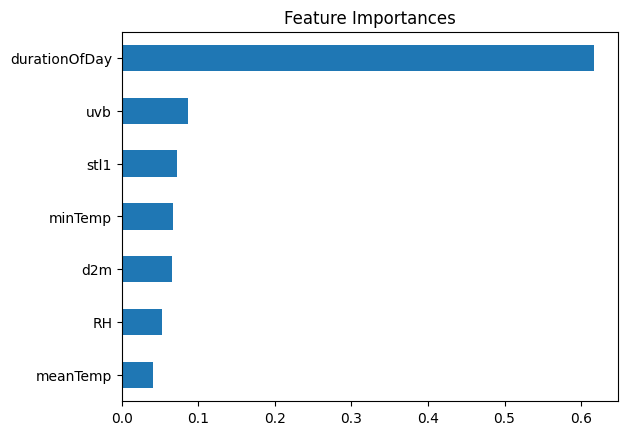

In [37]:
model_ranks = pd.Series(model.feature_importances_, index=X_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')
plt.title("Feature Importances")
plt.show()

In [38]:
test_score = clf2.score(X_test, y_test)
print('Test Set R-squared:', test_score)

Test Set R-squared: 0.5038290705232111


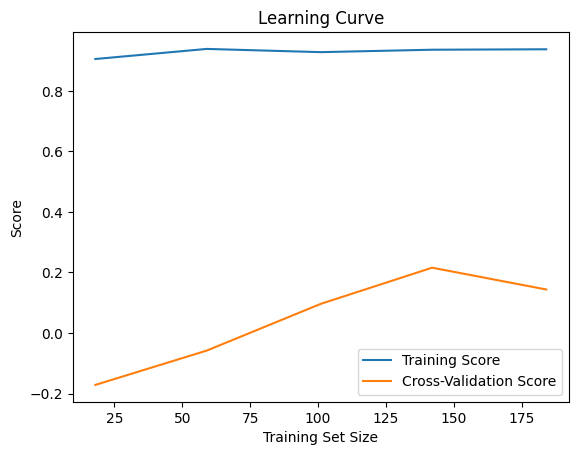

In [39]:
# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

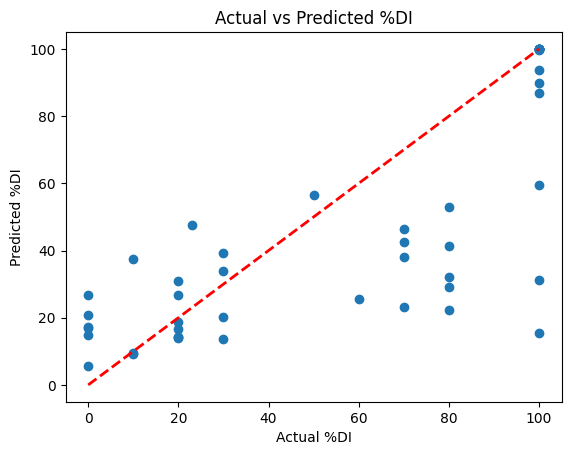

In [40]:
plt.scatter(y_test, y_pre)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # สร้างเส้นทแยงมุม 45 องศา
plt.xlabel("Actual %DI")
plt.ylabel("Predicted %DI")
plt.title("Actual vs Predicted %DI")
plt.show()

In [42]:
y_pred = clf2.predict(X_test)
y_pred_rounded = np.round(y_pred, 2)
result_df = pd.DataFrame({'Actual %DI': y_test, 'Predicted %DI': y_pred_rounded})
result_df['Absolute Difference'] = np.abs(result_df['Actual %DI'] - result_df['Predicted %DI'])
print(result_df)

   Actual %DI  Predicted %DI Absolute Difference
0         100          59.40                40.6
1          20          14.40                 5.6
2           0           5.70                 5.7
3         100          86.79               13.21
4         100         100.00                 0.0
5          80          32.20                47.8
6           0          16.86               16.86
7         100         100.00                 0.0
8          10           9.64                0.36
9          10          37.50                27.5
10         60          25.70                34.3
11         30          13.60                16.4
12         23          47.61               24.61
13         10           9.10                 0.9
14        100          89.85               10.15
15         70          46.40                23.6
16         20          14.20                 5.8
17        100         100.00                 0.0
18        100          93.58                6.42
19        100       